In [52]:
import sys
sys.path
sys.path.insert(1,'./packages')


#Imports
from __future__ import division, print_function

from keras.callbacks import Callback
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop
from keras.regularizers import l2
from keras.utils import np_utils

from sklearn import datasets
from sklearn.cross_validation import train_test_split
# from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [109]:
class prediction:

    def RF(X, Y, cv):
        """ Predict trait using Random Forest """
        numberTrees = 100

        Y_TRUE = []
        Y_PRED = []
        Y_TRUE_train = []
        Y_PRED_train = []

        mse = []
        r2 = []

        for train_index, test_index in kf.split(X):
            #print("TRAIN:", train_index, "TEST:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = Y[train_index], Y[test_index]

        # Build and fit the RF Regressor 
        model = RandomForestRegressor(n_estimators=numberTrees, min_samples_leaf = 5, min_samples_split=20, max_depth = 10, max_features=0.33, random_state=42) 

        model.fit(X_train, y_train)

        # Make predictions (test and training sets)
        y_pred = model.predict(X_test)
        y_pred_train = model.predict(X_train)


        Y_TRUE = np.append(Y_TRUE, y_test)
        Y_PRED = np.append(Y_PRED, y_pred)
        Y_TRUE_train = np.append(Y_TRUE_train, y_train)
        Y_PRED_train = np.append(Y_PRED_train, y_pred_train)

        mse = np.append(mse, (mean_squared_error(y_test, y_pred)))
        r2 = np.append(r2, (r2_score(y_test, y_pred)))

        return Y_TRUE, Y_PRED, Y_TRUE_train, Y_PRED_train, mse, r2
            
    def NN(X, Y):
            """ Predict trait using Neural Networks """
            Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
            Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, test_size=0.2, random_state=0)
            print(Xtrain.shape, Xval.shape, Xtest.shape, Ytrain.shape, Yval.shape, Ytest.shape)
            Xshape = Xtrain.shape
            #print('Training data')
            #print(Xtrain[:,0])
            #print(Xtrain[:,1])
            #print(Ytrain)
            # print(Ytest)
            # NN structure
            model = Sequential()
            model.add(Dense(20, input_dim=Xshape[1], activation='sigmoid',bias=True))
            model.add(Dense(60, input_dim=Xshape[1], activation='sigmoid',bias=True))
            model.add(Dense(30, input_dim=Xshape[1], activation='sigmoid',bias=True))
            #model.add(Dense(27, input_dim=Xshape[1], activation='sigmoid',bias=True))
            #model.add(Dense(20, input_dim=Xshape[1], activation='sigmoid',bias=True))
            #model.add(Dense(20, input_dim=Xshape[1], activation='sigmoid',bias=True))
            #model.add(Dense(20, input_dim=8, activation='sigmoid',bias=True))
            model.add(Dense(1, input_dim=Xshape[1], activation='sigmoid',bias=True))
            # training rate
            sgd = SGD(lr=1)
            model.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])
            model.summary()
            history = LossHistory()
            # train NN model
            model.fit(Xtrain, Ytrain, batch_size=20, nb_epoch=1000, shuffle=True, validation_data=(Xval, Yval), callbacks=[history])
            
            
            
            # Plot
            plt.figure(1,figsize=(15, 5))
            plt.subplot(121)
            plt.plot(range(len(history.losses)), history.losses)
            plt.xlabel("batch")
            plt.ylabel("loss")
            plt.grid()

            plt.subplot(122)
            plt.plot(range(len(history.accuracies)), history.accuracies)
            plt.xlabel("batch")
            plt.ylabel("acc")
            plt.grid()


plt.show()
            
            
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.accuracies = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get("loss"))
        self.accuracies.append(logs.get("acc"))

(204, 8) (52, 8) (65, 8) (204,) (52,) (65,)
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_199 (Dense)                (None, 20)            180         dense_input_49[0][0]             
____________________________________________________________________________________________________
dense_200 (Dense)                (None, 60)            1260        dense_199[0][0]                  
____________________________________________________________________________________________________
dense_201 (Dense)                (None, 30)            1830        dense_200[0][0]                  
____________________________________________________________________________________________________
dense_202 (Dense)                (None, 1)             31          dense_201[0][0]                  
Total params: 3301
____________________________

204/204 [==============================] - 0s - loss: 0.1560 - acc: 0.8088 - val_loss: 0.1037 - val_acc: 0.8846
Epoch 56/1000
204/204 [==============================] - 0s - loss: 0.1556 - acc: 0.8088 - val_loss: 0.1035 - val_acc: 0.8846
Epoch 57/1000
204/204 [==============================] - 0s - loss: 0.1560 - acc: 0.8088 - val_loss: 0.1035 - val_acc: 0.8846
Epoch 58/1000
204/204 [==============================] - 0s - loss: 0.1561 - acc: 0.8088 - val_loss: 0.1035 - val_acc: 0.8846
Epoch 59/1000
204/204 [==============================] - 0s - loss: 0.1550 - acc: 0.8088 - val_loss: 0.1339 - val_acc: 0.8846
Epoch 60/1000
204/204 [==============================] - 0s - loss: 0.1568 - acc: 0.8088 - val_loss: 0.1041 - val_acc: 0.8846
Epoch 61/1000
204/204 [==============================] - 0s - loss: 0.1562 - acc: 0.8088 - val_loss: 0.1102 - val_acc: 0.8846
Epoch 62/1000
204/204 [==============================] - 0s - loss: 0.1552 - acc: 0.8088 - val_loss: 0.1093 - val_acc: 0.8846
Epoch 

204/204 [==============================] - 0s - loss: 0.1512 - acc: 0.8088 - val_loss: 0.1094 - val_acc: 0.8846
Epoch 120/1000
204/204 [==============================] - 0s - loss: 0.1501 - acc: 0.8088 - val_loss: 0.1102 - val_acc: 0.8846
Epoch 121/1000
204/204 [==============================] - 0s - loss: 0.1497 - acc: 0.8088 - val_loss: 0.1193 - val_acc: 0.8846
Epoch 122/1000
204/204 [==============================] - 0s - loss: 0.1485 - acc: 0.8088 - val_loss: 0.1342 - val_acc: 0.8846
Epoch 123/1000
204/204 [==============================] - 0s - loss: 0.1506 - acc: 0.8088 - val_loss: 0.1193 - val_acc: 0.8846
Epoch 124/1000
204/204 [==============================] - 0s - loss: 0.1488 - acc: 0.8088 - val_loss: 0.1307 - val_acc: 0.8846
Epoch 125/1000
204/204 [==============================] - 0s - loss: 0.1486 - acc: 0.8088 - val_loss: 0.1090 - val_acc: 0.8846
Epoch 126/1000
204/204 [==============================] - 0s - loss: 0.1490 - acc: 0.8088 - val_loss: 0.1094 - val_acc: 0.8846

204/204 [==============================] - 0s - loss: 0.0919 - acc: 0.8578 - val_loss: 0.1256 - val_acc: 0.8654
Epoch 184/1000
204/204 [==============================] - 0s - loss: 0.0860 - acc: 0.9069 - val_loss: 0.1121 - val_acc: 0.8846
Epoch 185/1000
204/204 [==============================] - 0s - loss: 0.0968 - acc: 0.8775 - val_loss: 0.1188 - val_acc: 0.8654
Epoch 186/1000
204/204 [==============================] - 0s - loss: 0.0870 - acc: 0.8824 - val_loss: 0.2277 - val_acc: 0.6346
Epoch 187/1000
204/204 [==============================] - 0s - loss: 0.0851 - acc: 0.9118 - val_loss: 0.1387 - val_acc: 0.8462
Epoch 188/1000
204/204 [==============================] - 0s - loss: 0.0740 - acc: 0.9167 - val_loss: 0.1407 - val_acc: 0.8269
Epoch 189/1000
204/204 [==============================] - 0s - loss: 0.0756 - acc: 0.9118 - val_loss: 0.1409 - val_acc: 0.8269
Epoch 190/1000
204/204 [==============================] - 0s - loss: 0.0686 - acc: 0.9216 - val_loss: 0.1200 - val_acc: 0.8846

204/204 [==============================] - 0s - loss: 0.0210 - acc: 0.9804 - val_loss: 0.1652 - val_acc: 0.8077
Epoch 248/1000
204/204 [==============================] - 0s - loss: 0.0220 - acc: 0.9804 - val_loss: 0.1649 - val_acc: 0.8077
Epoch 249/1000
204/204 [==============================] - 0s - loss: 0.0204 - acc: 0.9804 - val_loss: 0.1651 - val_acc: 0.8077
Epoch 250/1000
204/204 [==============================] - 0s - loss: 0.0220 - acc: 0.9804 - val_loss: 0.1672 - val_acc: 0.8077
Epoch 251/1000
204/204 [==============================] - 0s - loss: 0.0211 - acc: 0.9804 - val_loss: 0.1599 - val_acc: 0.8077
Epoch 252/1000
204/204 [==============================] - 0s - loss: 0.0246 - acc: 0.9755 - val_loss: 0.1592 - val_acc: 0.8077
Epoch 253/1000
204/204 [==============================] - 0s - loss: 0.0249 - acc: 0.9706 - val_loss: 0.1160 - val_acc: 0.8462
Epoch 254/1000
204/204 [==============================] - 0s - loss: 0.1561 - acc: 0.8186 - val_loss: 0.1182 - val_acc: 0.8846

204/204 [==============================] - 0s - loss: 0.0163 - acc: 0.9755 - val_loss: 0.1711 - val_acc: 0.7885
Epoch 312/1000
204/204 [==============================] - 0s - loss: 0.0174 - acc: 0.9755 - val_loss: 0.1732 - val_acc: 0.7885
Epoch 313/1000
204/204 [==============================] - 0s - loss: 0.0202 - acc: 0.9755 - val_loss: 0.1764 - val_acc: 0.7500
Epoch 314/1000
204/204 [==============================] - 0s - loss: 0.0183 - acc: 0.9853 - val_loss: 0.1693 - val_acc: 0.7885
Epoch 315/1000
204/204 [==============================] - 0s - loss: 0.0147 - acc: 0.9804 - val_loss: 0.1692 - val_acc: 0.7885
Epoch 316/1000
204/204 [==============================] - 0s - loss: 0.0155 - acc: 0.9804 - val_loss: 0.1281 - val_acc: 0.8654
Epoch 317/1000
204/204 [==============================] - 0s - loss: 0.0296 - acc: 0.9706 - val_loss: 0.1647 - val_acc: 0.8077
Epoch 318/1000
204/204 [==============================] - 0s - loss: 0.0142 - acc: 0.9853 - val_loss: 0.1598 - val_acc: 0.8077

204/204 [==============================] - 0s - loss: 0.0157 - acc: 0.9755 - val_loss: 0.1773 - val_acc: 0.7692
Epoch 376/1000
204/204 [==============================] - 0s - loss: 0.0149 - acc: 0.9804 - val_loss: 0.1645 - val_acc: 0.8269
Epoch 377/1000
204/204 [==============================] - 0s - loss: 0.0114 - acc: 0.9853 - val_loss: 0.1637 - val_acc: 0.8077
Epoch 378/1000
204/204 [==============================] - 0s - loss: 0.0112 - acc: 0.9853 - val_loss: 0.1933 - val_acc: 0.7308
Epoch 379/1000
204/204 [==============================] - 0s - loss: 0.0169 - acc: 0.9755 - val_loss: 0.1773 - val_acc: 0.7692
Epoch 380/1000
204/204 [==============================] - 0s - loss: 0.0139 - acc: 0.9804 - val_loss: 0.1615 - val_acc: 0.8269
Epoch 381/1000
204/204 [==============================] - 0s - loss: 0.0141 - acc: 0.9755 - val_loss: 0.1645 - val_acc: 0.8269
Epoch 382/1000
204/204 [==============================] - 0s - loss: 0.0113 - acc: 0.9804 - val_loss: 0.1652 - val_acc: 0.8077

204/204 [==============================] - 0s - loss: 0.0099 - acc: 0.9853 - val_loss: 0.1910 - val_acc: 0.7885
Epoch 440/1000
204/204 [==============================] - 0s - loss: 0.0137 - acc: 0.9804 - val_loss: 0.1573 - val_acc: 0.8269
Epoch 441/1000
204/204 [==============================] - 0s - loss: 0.0125 - acc: 0.9853 - val_loss: 0.1607 - val_acc: 0.8269
Epoch 442/1000
204/204 [==============================] - 0s - loss: 0.0130 - acc: 0.9853 - val_loss: 0.1539 - val_acc: 0.8269
Epoch 443/1000
204/204 [==============================] - 0s - loss: 0.0161 - acc: 0.9755 - val_loss: 0.1508 - val_acc: 0.8269
Epoch 444/1000
204/204 [==============================] - 0s - loss: 0.0150 - acc: 0.9804 - val_loss: 0.1541 - val_acc: 0.8269
Epoch 445/1000
204/204 [==============================] - 0s - loss: 0.0129 - acc: 0.9804 - val_loss: 0.1540 - val_acc: 0.8269
Epoch 446/1000
204/204 [==============================] - 0s - loss: 0.0100 - acc: 0.9902 - val_loss: 0.1751 - val_acc: 0.7885

204/204 [==============================] - 0s - loss: 0.0142 - acc: 0.9853 - val_loss: 0.1527 - val_acc: 0.8269
Epoch 504/1000
204/204 [==============================] - 0s - loss: 0.0142 - acc: 0.9853 - val_loss: 0.1524 - val_acc: 0.8269
Epoch 505/1000
204/204 [==============================] - 0s - loss: 0.0137 - acc: 0.9853 - val_loss: 0.1534 - val_acc: 0.8077
Epoch 506/1000
204/204 [==============================] - 0s - loss: 0.0132 - acc: 0.9853 - val_loss: 0.1540 - val_acc: 0.8269
Epoch 507/1000
204/204 [==============================] - 0s - loss: 0.0142 - acc: 0.9853 - val_loss: 0.1537 - val_acc: 0.8269
Epoch 508/1000
204/204 [==============================] - 0s - loss: 0.0137 - acc: 0.9853 - val_loss: 0.1523 - val_acc: 0.7885
Epoch 509/1000
204/204 [==============================] - 0s - loss: 0.0131 - acc: 0.9853 - val_loss: 0.1556 - val_acc: 0.8269
Epoch 510/1000
204/204 [==============================] - 0s - loss: 0.0136 - acc: 0.9853 - val_loss: 0.1550 - val_acc: 0.7692

204/204 [==============================] - 0s - loss: 0.0147 - acc: 0.9804 - val_loss: 0.1526 - val_acc: 0.7885
Epoch 568/1000
204/204 [==============================] - 0s - loss: 0.0094 - acc: 0.9902 - val_loss: 0.1599 - val_acc: 0.7692
Epoch 569/1000
204/204 [==============================] - 0s - loss: 0.0125 - acc: 0.9853 - val_loss: 0.1599 - val_acc: 0.7692
Epoch 570/1000
204/204 [==============================] - 0s - loss: 0.0113 - acc: 0.9902 - val_loss: 0.1524 - val_acc: 0.8077
Epoch 571/1000
204/204 [==============================] - 0s - loss: 0.0103 - acc: 0.9902 - val_loss: 0.1500 - val_acc: 0.8077
Epoch 572/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9755 - val_loss: 0.1480 - val_acc: 0.8269
Epoch 573/1000
204/204 [==============================] - 0s - loss: 0.0116 - acc: 0.9853 - val_loss: 0.1455 - val_acc: 0.8462
Epoch 574/1000
204/204 [==============================] - 0s - loss: 0.0147 - acc: 0.9804 - val_loss: 0.1479 - val_acc: 0.8269

204/204 [==============================] - 0s - loss: 0.0144 - acc: 0.9853 - val_loss: 0.1533 - val_acc: 0.8077
Epoch 632/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9853 - val_loss: 0.1545 - val_acc: 0.8269
Epoch 633/1000
204/204 [==============================] - 0s - loss: 0.0141 - acc: 0.9853 - val_loss: 0.1555 - val_acc: 0.8077
Epoch 634/1000
204/204 [==============================] - 0s - loss: 0.0139 - acc: 0.9853 - val_loss: 0.1593 - val_acc: 0.7885
Epoch 635/1000
204/204 [==============================] - 0s - loss: 0.0144 - acc: 0.9804 - val_loss: 0.1560 - val_acc: 0.7885
Epoch 636/1000
204/204 [==============================] - 0s - loss: 0.0145 - acc: 0.9853 - val_loss: 0.1541 - val_acc: 0.8269
Epoch 637/1000
204/204 [==============================] - 0s - loss: 0.0140 - acc: 0.9853 - val_loss: 0.1567 - val_acc: 0.7885
Epoch 638/1000
204/204 [==============================] - 0s - loss: 0.0138 - acc: 0.9853 - val_loss: 0.1613 - val_acc: 0.7885

204/204 [==============================] - 0s - loss: 0.0098 - acc: 0.9902 - val_loss: 0.1610 - val_acc: 0.8269
Epoch 696/1000
204/204 [==============================] - 0s - loss: 0.0098 - acc: 0.9902 - val_loss: 0.1556 - val_acc: 0.8077
Epoch 697/1000
204/204 [==============================] - 0s - loss: 0.0099 - acc: 0.9902 - val_loss: 0.1572 - val_acc: 0.8077
Epoch 698/1000
204/204 [==============================] - 0s - loss: 0.0106 - acc: 0.9853 - val_loss: 0.1450 - val_acc: 0.8462
Epoch 699/1000
204/204 [==============================] - 0s - loss: 0.0124 - acc: 0.9902 - val_loss: 0.1535 - val_acc: 0.8269
Epoch 700/1000
204/204 [==============================] - 0s - loss: 0.0109 - acc: 0.9902 - val_loss: 0.1539 - val_acc: 0.8269
Epoch 701/1000
204/204 [==============================] - 0s - loss: 0.0139 - acc: 0.9804 - val_loss: 0.1543 - val_acc: 0.8269
Epoch 702/1000
204/204 [==============================] - 0s - loss: 0.0118 - acc: 0.9853 - val_loss: 0.1630 - val_acc: 0.8077

204/204 [==============================] - 0s - loss: 0.0182 - acc: 0.9804 - val_loss: 0.1666 - val_acc: 0.8077
Epoch 760/1000
204/204 [==============================] - 0s - loss: 0.0144 - acc: 0.9853 - val_loss: 0.1664 - val_acc: 0.8077
Epoch 761/1000
204/204 [==============================] - 0s - loss: 0.0140 - acc: 0.9853 - val_loss: 0.1645 - val_acc: 0.8077
Epoch 762/1000
204/204 [==============================] - 0s - loss: 0.0144 - acc: 0.9853 - val_loss: 0.1651 - val_acc: 0.8077
Epoch 763/1000
204/204 [==============================] - 0s - loss: 0.0137 - acc: 0.9853 - val_loss: 0.1638 - val_acc: 0.8077
Epoch 764/1000
204/204 [==============================] - 0s - loss: 0.0144 - acc: 0.9804 - val_loss: 0.1672 - val_acc: 0.8077
Epoch 765/1000
204/204 [==============================] - 0s - loss: 0.0140 - acc: 0.9853 - val_loss: 0.1668 - val_acc: 0.8077
Epoch 766/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9804 - val_loss: 0.1674 - val_acc: 0.8077

204/204 [==============================] - 0s - loss: 0.0138 - acc: 0.9853 - val_loss: 0.1632 - val_acc: 0.7885
Epoch 824/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9804 - val_loss: 0.1648 - val_acc: 0.7885
Epoch 825/1000
204/204 [==============================] - 0s - loss: 0.0136 - acc: 0.9853 - val_loss: 0.1634 - val_acc: 0.7885
Epoch 826/1000
204/204 [==============================] - 0s - loss: 0.0145 - acc: 0.9804 - val_loss: 0.1645 - val_acc: 0.7885
Epoch 827/1000
204/204 [==============================] - 0s - loss: 0.0142 - acc: 0.9804 - val_loss: 0.1631 - val_acc: 0.8077
Epoch 828/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9853 - val_loss: 0.1644 - val_acc: 0.8077
Epoch 829/1000
204/204 [==============================] - 0s - loss: 0.0139 - acc: 0.9853 - val_loss: 0.1959 - val_acc: 0.7885
Epoch 830/1000
204/204 [==============================] - 0s - loss: 0.0150 - acc: 0.9853 - val_loss: 0.1625 - val_acc: 0.8269

204/204 [==============================] - 0s - loss: 0.0144 - acc: 0.9804 - val_loss: 0.1771 - val_acc: 0.7885
Epoch 888/1000
204/204 [==============================] - 0s - loss: 0.0141 - acc: 0.9853 - val_loss: 0.1771 - val_acc: 0.7885
Epoch 889/1000
204/204 [==============================] - 0s - loss: 0.0137 - acc: 0.9853 - val_loss: 0.1763 - val_acc: 0.7885
Epoch 890/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9804 - val_loss: 0.1680 - val_acc: 0.8077
Epoch 891/1000
204/204 [==============================] - 0s - loss: 0.0152 - acc: 0.9853 - val_loss: 0.1719 - val_acc: 0.7885
Epoch 892/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9853 - val_loss: 0.1744 - val_acc: 0.7885
Epoch 893/1000
204/204 [==============================] - 0s - loss: 0.0140 - acc: 0.9853 - val_loss: 0.1759 - val_acc: 0.7885
Epoch 894/1000
204/204 [==============================] - 0s - loss: 0.0140 - acc: 0.9853 - val_loss: 0.1755 - val_acc: 0.7885

204/204 [==============================] - 0s - loss: 0.0139 - acc: 0.9853 - val_loss: 0.1705 - val_acc: 0.8077
Epoch 952/1000
204/204 [==============================] - 0s - loss: 0.0135 - acc: 0.9853 - val_loss: 0.1686 - val_acc: 0.7885
Epoch 953/1000
204/204 [==============================] - 0s - loss: 0.0141 - acc: 0.9853 - val_loss: 0.1691 - val_acc: 0.7885
Epoch 954/1000
204/204 [==============================] - 0s - loss: 0.0140 - acc: 0.9853 - val_loss: 0.1686 - val_acc: 0.7885
Epoch 955/1000
204/204 [==============================] - 0s - loss: 0.0140 - acc: 0.9853 - val_loss: 0.1579 - val_acc: 0.8269
Epoch 956/1000
204/204 [==============================] - 0s - loss: 0.0151 - acc: 0.9853 - val_loss: 0.1583 - val_acc: 0.8269
Epoch 957/1000
204/204 [==============================] - 0s - loss: 0.0143 - acc: 0.9853 - val_loss: 0.1591 - val_acc: 0.8269
Epoch 958/1000
204/204 [==============================] - 0s - loss: 0.0142 - acc: 0.9853 - val_loss: 0.1606 - val_acc: 0.7885

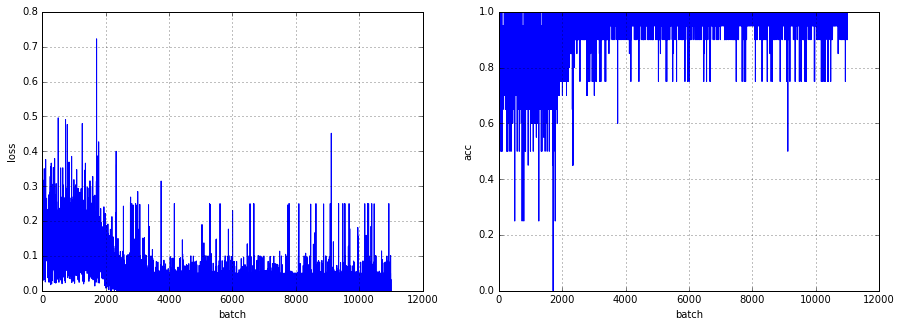

In [110]:
# Main function


FS = "False"

# Path to Genotype File
G = 'genotype_PCA_30p_1200Kb.csv'
#G = 'genotype_sub_1200Kb_1.csv'
# Path to Phenotype File
P = 'corrected_RYT2012DS_plotdata_by_GHID.csv'
# Column name for trait to use in Phenotype File
T = 'Plot_Yld'
# Prediction method to use
M = 'NN'    

# selection percentage
selectionPercentage = 0.3

 ### Data pre-processing ### 
genotype_file = pd.read_csv(G, index_col = "Entry")
phenotype_file = pd.read_csv(P)

# Average pheotype values for each line
grouped = phenotype_file.groupby(['GHID'])[T].agg([np.average]).reset_index()
grouped = grouped.set_index("GHID")

# Merge genotype and phenotype files by line name (GHID/Entry)
df = pd.concat([grouped, genotype_file], axis=1, join='inner')

# Drop rows that don't have trait value
df = df.dropna(subset=["average"], how = "any")

# Make X & Y for machine learning
X = df.drop('average', axis=1).values  
Y = df.loc[:, 'average'].values

# kf = KFold(n_splits=10, random_state = 42)   # set k-fold number

  
#if FS == "True" or FS == "T" or FS == "true": 
#    X = prediction.FeatSel(X,Y)

# prediction
    
if M == "RF" or M == "RandomForest":
    from sklearn.ensemble import RandomForestRegressor
    Y_TRUE, Y_PRED, Y_TRUE_train, Y_PRED_train, mse, r2 = prediction.RF(X, Y, kf)

elif M == "NN" or M == "NeuralNetworks":
    Y_max = np.max(Y)
    Y_min = np.min(Y)
    for i in range(0,Y.size):
        if((Y[i]-Y_min) > (1-selectionPercentage)*(Y_max-Y_min)):
            Y[i] = 1
        else:
            Y[i] = 0
    #print(Y)            
    prediction.NN(X, Y)

elif M == "SVM" or M == "svm":
    from sklearn import svm
    Y_TRUE, Y_PRED, Y_TRUE_train, Y_PRED_train, mse, r2  = prediction.SVM(X, Y, kf)
    
else:
    print("Prediction method not available in this script")